In [0]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import re # for regular expressions
pd.set_option("display.max_colwidth", 200)
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [21]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving sentiment_train1.csv to sentiment_train1.csv
User uploaded file "sentiment_train1.csv" with length 12454666 bytes


In [24]:
!git clone https://github.com/prateekjoshi565/twitter_sentiment_analysis.git

Cloning into 'twitter_sentiment_analysis'...
remote: Enumerating objects: 13, done.
remote: Total 13 (delta 0), reused 0 (delta 0), pack-reused 13
Unpacking objects: 100% (13/13), done.


In [32]:
!cd twitter_sentiment_analysis/ ; ls

/bin/bash: line 0: cd: twitter_sentiment_analysis/: No such file or directory
code_sentiment_analysis.ipynb  test_tweets_anuFYb8.csv
README.md		       train_E6oV3lV.csv


In [0]:
import os
os.chdir('twitter_sentiment_analysis')

In [33]:
!ls

code_sentiment_analysis.ipynb  test_tweets_anuFYb8.csv
README.md		       train_E6oV3lV.csv


In [0]:
train= pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [35]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [36]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
id       17197 non-null int64
tweet    17197 non-null object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [40]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [43]:
train.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [0]:
train.drop(['id'],axis=1,inplace=True)

In [46]:
train.head()

,label,tweet
0,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,0,bihday your majesty
3,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,0,factsguide: society now #motivation


In [0]:
test.drop(['id'],axis=1,inplace=True)

In [50]:
test.head()

,tweet
0,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [51]:
train.shape, test.shape

((31962, 2), (17197, 1))

In [52]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In the train dataset, we have 2,242 (~7%) tweets labeled as racist or sexist, and 29,720 (~93%) tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge.

check the distribution of length of the tweets, in terms of words, in both train and test data.

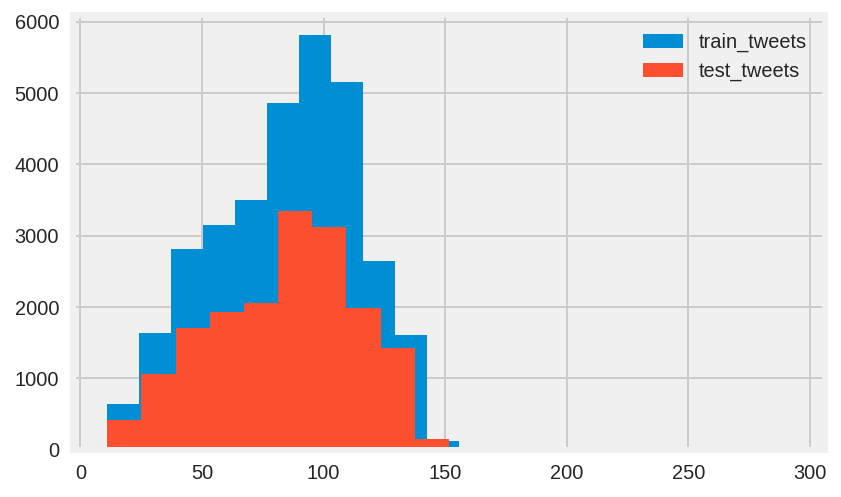

In [53]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

tweet-length distribution is more or less the same in both train and test data.

In [57]:
combi = train.append(test, ignore_index=True)   #data cleaning
combi.shape
combi.head()

,label,tweet
0,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,0.0,bihday your majesty
3,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,0.0,factsguide: society now #motivation


In [0]:
def remove_pattern(input_txt, pattern):                    #to remove unwanted text patterns from the tweets.
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [0]:
import re

In [77]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")     #Removing Twitter Handles (@user)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(10)

,label,tweet,tidy_tweet
0,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,0.0,bihday your majesty,bihday your majesty
3,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [79]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))  #Removing Short Words
combi.head()

,label,tweet,tidy_tweet
0,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,0.0,bihday your majesty,bihday your majesty
3,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,0.0,factsguide: society now #motivation,factsguide society #motivation


In [80]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [0]:
from nltk.stem.porter import *    #Now we can normalize the tokenized tweets.
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [0]:
for i in range(len(tokenized_tweet)):           #Now let’s stitch these tokens back together.
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

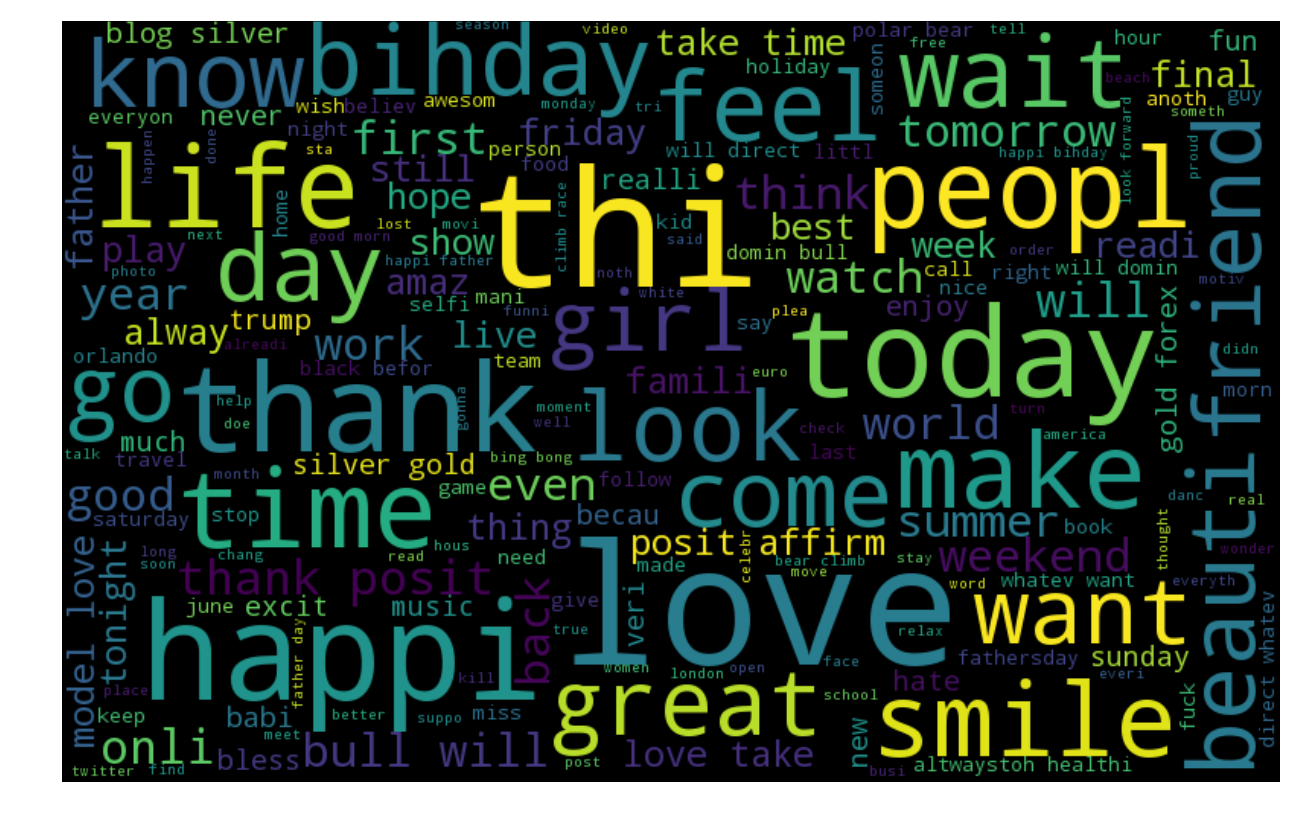

In [83]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()        #We can see most of the words are positive or neutral. Words like love, great, friend, life are the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets.

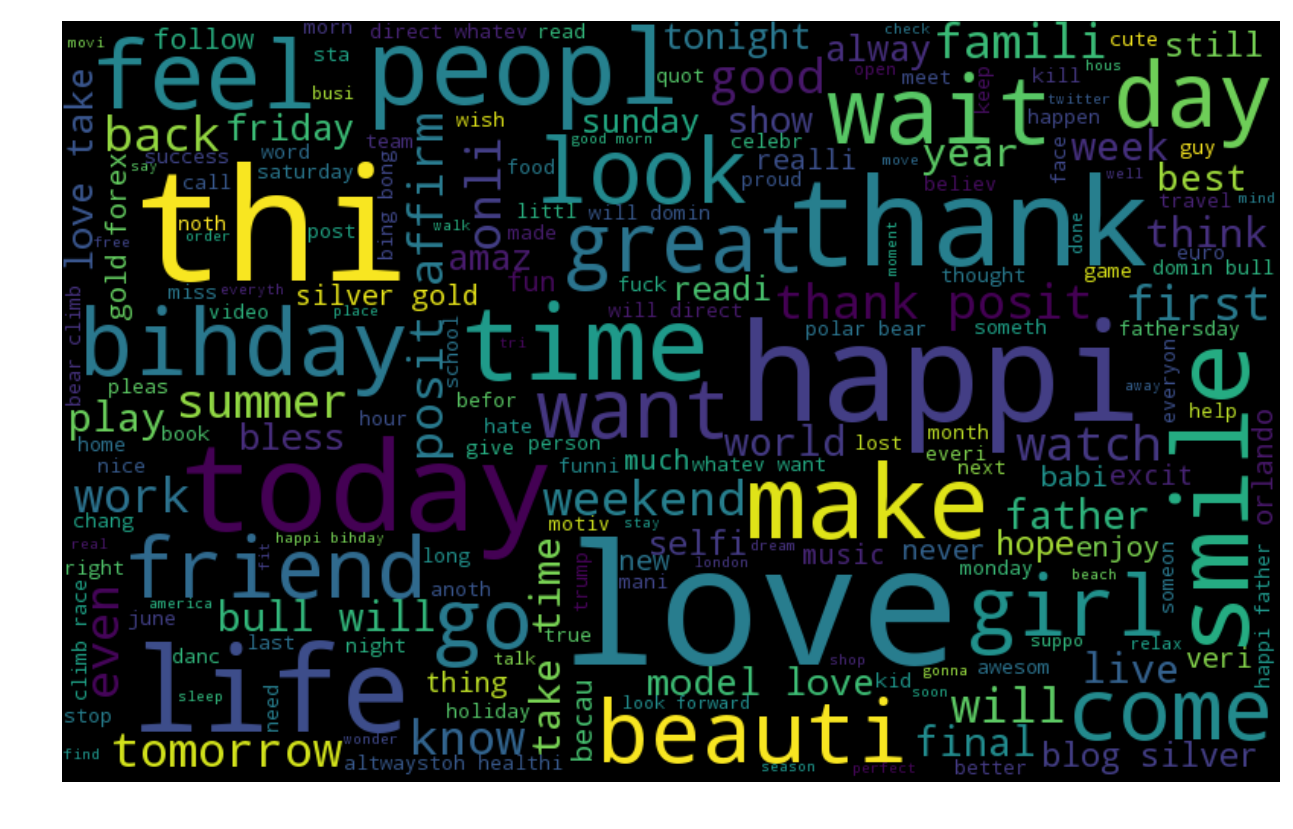

In [84]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()       #Words in non racist/sexist tweets


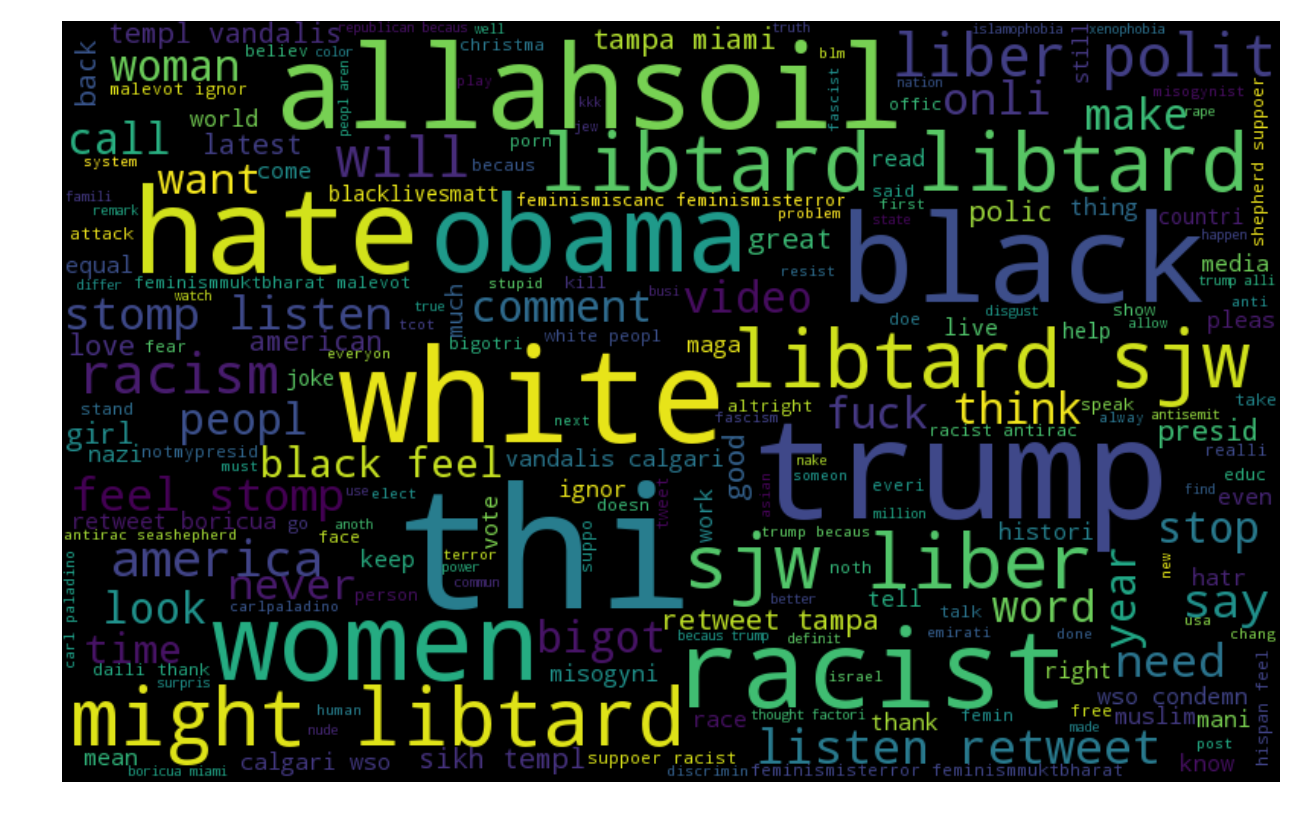

In [85]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()   #Racist/Sexist Tweets

**Understanding the impact of Hashtags on tweets sentiment**

In [0]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [0]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


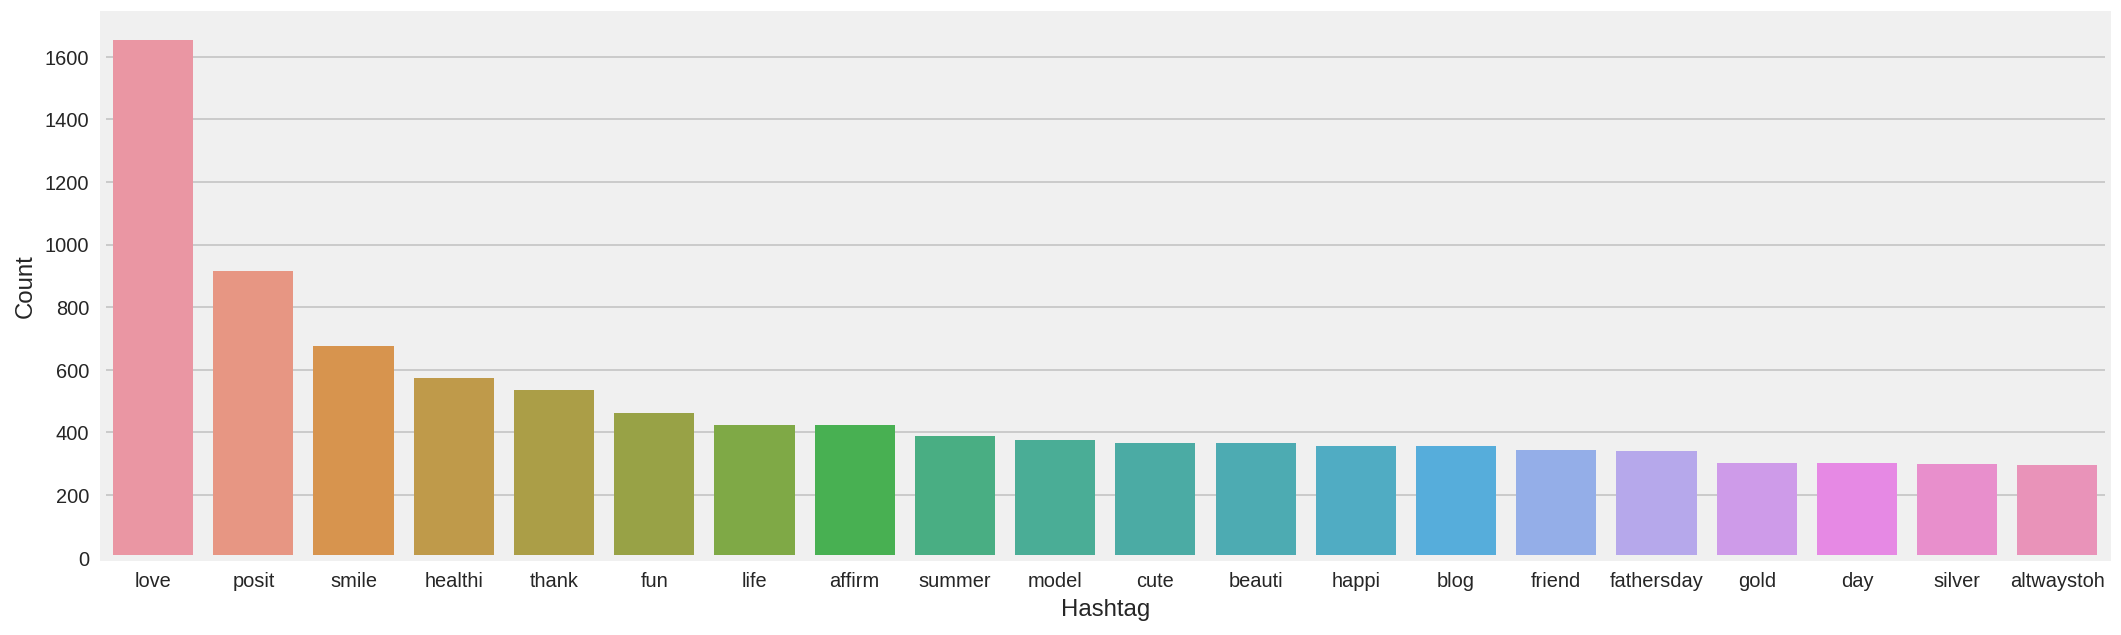

In [88]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()
#Non-Racist/Sexist Tweets

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


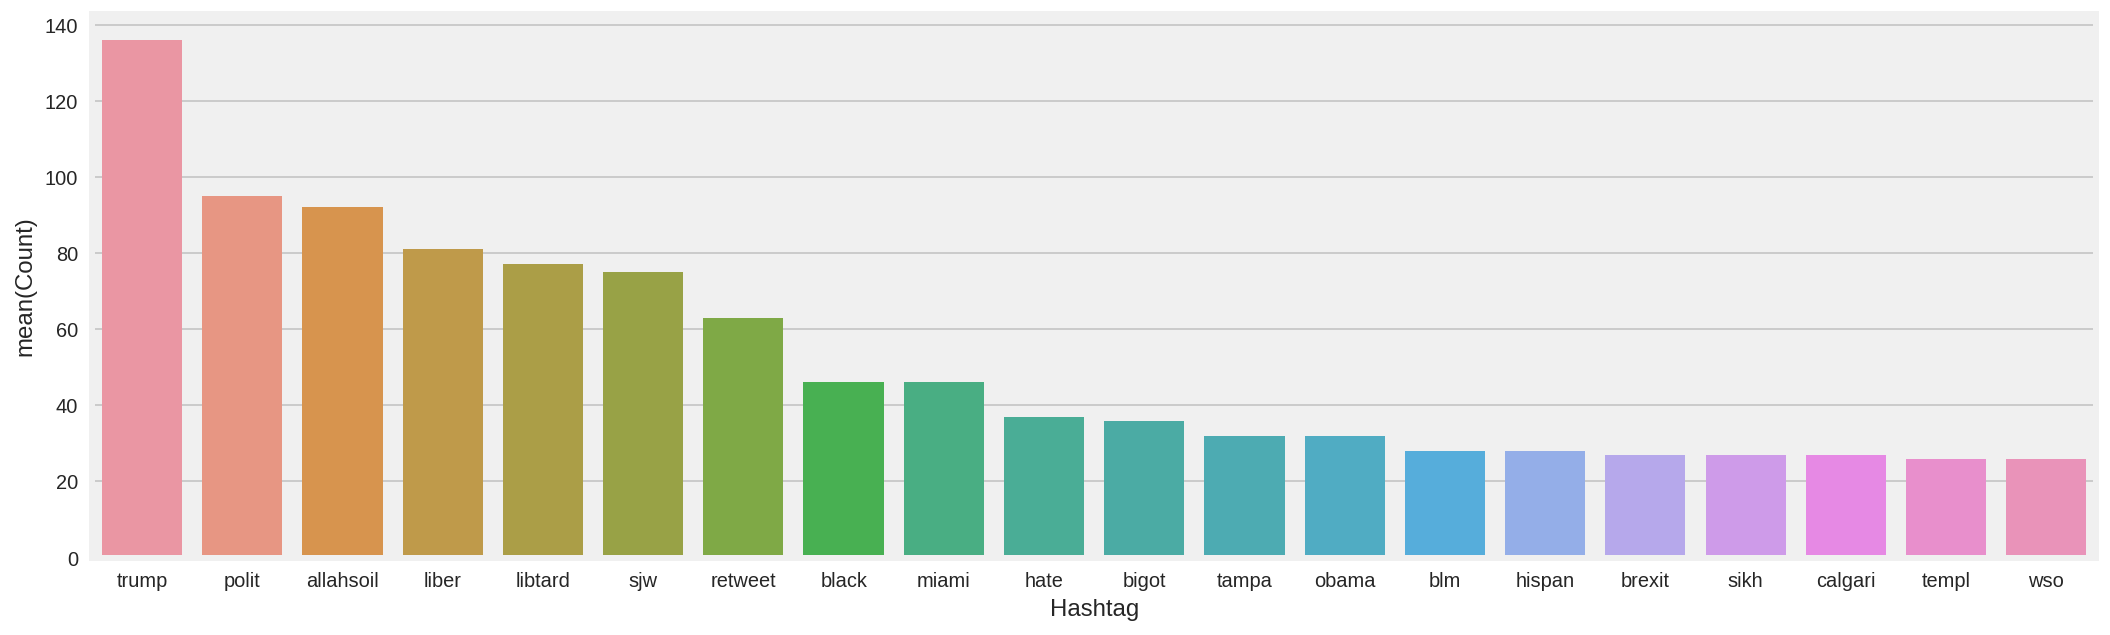

In [90]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer   # Extracting Features from Cleaned Tweets
import gensim

In [93]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html


In [94]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [95]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6510028, 7536020)

https://towardsdatascience.com/an-implementation-guide-to-word2vec-using-numpy-and-google-sheets-13445eebd281

In [96]:
model_w2v.wv.most_similar(positive="love")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('cassidi', 0.5047198534011841),
 ('#heroesdayug', 0.49348896741867065),
 ('feck', 0.48128873109817505),
 ('viola', 0.4812559187412262),
 ('thanku', 0.47905731201171875),
 ('brad', 0.47898346185684204),
 ('cristina', 0.47421395778656006),
 ('maddi', 0.47345787286758423),
 ('corrieeeeee', 0.47180837392807007),
 ('#bihdaybash', 0.4680074453353882)]

In [97]:
model_w2v['love']

array([ 0.10837181,  0.05861406, -0.40206462, -0.01378909,  0.19229285,
       -0.52704144,  0.03246754,  0.22608861,  0.49405006,  0.20481165,
        0.22198418, -0.37421083, -0.0082944 , -0.20860986, -0.4705394 ,
       -0.01581358, -0.37544182, -0.44025248, -0.06985079, -0.12118737,
        0.00115102,  0.06547786,  0.08507586, -0.32200292,  0.23294085,
        0.08109773,  0.1242286 ,  0.00846384, -0.20967814, -0.19411789,
        0.04124676,  0.42497832,  0.43832994,  0.11183355, -0.30193448,
        0.35821941, -0.13196754,  0.00414   , -0.58862054, -0.13790704,
        0.35566336, -0.38118055, -0.08968836,  0.49496046, -0.12925372,
       -0.54860973, -0.11085258,  0.10992359, -0.17017925, -0.15844339,
        0.15793183, -0.1500069 , -0.6211081 , -0.07133634, -0.26124433,
        0.34886655,  0.11809406,  0.31445137, -0.3868699 ,  0.01286446,
       -0.30236673, -0.39666134, -0.6303914 , -0.47964606,  0.4188571 ,
        0.15102611,  0.08337217,  0.13701823,  0.25357887,  0.11

In [98]:
len(model_w2v['food']) #The length of the vector is 200

200

In [0]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec          #to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [100]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape     #word2vec featureset

(49159, 200)

In [0]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [0]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [106]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)   #bag of words

0.5130687318489837

In [0]:
test_pred = xgb_model.predict(test_bow)
test['label'] = test_pred
submission = test[['label']]
submission.to_csv('sub_xgb_bow.csv', index=False)

In [0]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [111]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)

prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5185891325071497

In [0]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [0]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain)

In [115]:
prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.6539855072463768

https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

In [0]:
import xgboost as xgb

In [0]:
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain)
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid)
dtest = xgb.DMatrix(test_w2v)     #model fine tuning, use DMatrices. A DMatrix can contain both the features and the target.

In [0]:
# Parameters that we are going to tune
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
}

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [0]:
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]     #prepare a custom evaluation metric to calculate F1 score.

In [0]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10) 
    for min_child_weight in range(5,8)
]

In [121]:
max_f1 = 0. # initializing with 0
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

    # Cross-validation
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight)

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with max_depth=6, min_child_weight=5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.


	F1 Score 0.6807222 for 75 rounds
CV with max_depth=6, min_child_weight=6
	F1 Score 0.6620096 for 48 rounds
CV with max_depth=6, min_child_weight=7
	F1 Score 0.6846438 for 92 rounds
CV with max_depth=7, min_child_weight=5
	F1 Score 0.6828348 for 71 rounds
CV with max_depth=7, min_child_weight=6
	F1 Score 0.6638360000000001 for 41 rounds
CV with max_depth=7, min_child_weight=7
	F1 Score 0.6812818 for 39 rounds
CV with max_depth=8, min_child_weight=5
	F1 Score 0.6637962000000001 for 31 rounds
CV with max_depth=8, min_child_weight=6
	F1 Score 0.6742962 for 54 rounds
CV with max_depth=8, min_child_weight=7
	F1 Score 0.6577964 for 23 rounds
CV with max_depth=9, min_child_weight=5
	F1 Score 0.6799006 for 55 rounds
CV with max_depth=9, min_child_weight=6
	F1 Score 0.6734513999999999 for 58 rounds
CV with max_depth=9, min_child_weight=7
	F1 Score 0.6603356 for 34 rounds
Best params: 6, 7, F1 Score: 0.6846438


In [123]:
xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
)

[0]	Validation-error:0.063302	Validation-f1_score:0.133165
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 10 rounds.
[1]	Validation-error:0.05767	Validation-f1_score:0.40785
[2]	Validation-error:0.055376	Validation-f1_score:0.491921
[3]	Validation-error:0.053499	Validation-f1_score:0.532594
[4]	Validation-error:0.053812	Validation-f1_score:0.55096
[5]	Validation-error:0.053186	Validation-f1_score:0.556654
[6]	Validation-error:0.053082	Validation-f1_score:0.563707
[7]	Validation-error:0.053082	Validation-f1_score:0.56651
[8]	Validation-error:0.052456	Validation-f1_score:0.56761
[9]	Validation-error:0.050579	Validation-f1_score:0.56917
[10]	Validation-error:0.050683	Validation-f1_score:0.575299
[11]	Validation-error:0.050475	Validation-f1_score:0.584057
[12]	Validation-error:0.050787	Validation-f1_score:0.59318
[13]	Validation-error:0.049849	Validation-f1_score:0.598086
[14]	Validatio

https://github.com/prateekjoshi565/twitter_sentiment_analysis/blob/master/code_sentiment_analysis.ipynb

https://github.com/tthustla/twitter_sentiment_analysis_part1/blob/master/Capstone_part2.ipynb

In [0]:
test_pred = xgb_model.predict(dtest)
test['label'] = (test_pred >= 0.3).astype(np.int)
submission = test[['label']]
submission.to_csv('sub_xgb_w2v_06062018.csv', index=False)

In [126]:
!ls

code_sentiment_analysis.ipynb  sub_xgb_w2v_06062018.csv
README.md		       test_tweets_anuFYb8.csv
sub_xgb_bow.csv		       train_E6oV3lV.csv


In [0]:
sub= pd.read_csv'(sub_xgb_w2v_06062018.csv)'

In [129]:
sub.head(50)

,label
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
